In [1]:
from drift_detection.drift_detector.reductor import Reductor
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
reductor = Reductor("BBSDs_untrained_FFNN", var_ret=0.99)
reductor.load_dataset(X)
reductor.fit()
X_transformed = reductor.transform()

In [2]:
X_transformed.shape

(150, 1)

In [3]:
X.shape

(150, 4)

In [1]:
import torchxrayvision as xrv
from torchxrayvision.datasets import NIH_Dataset
from torchxrayvision.datasets import XRayCenterCrop, XRayResizer
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import os

2022-08-21 22:09:28.465989: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-21 22:09:28.466010: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-21 22:09:30.299716: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 22:09:30.300557: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-21 22:09:30.300599: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.s

In [28]:
dataset = NIH_Dataset('/home/akore/NIHCXR/images', '/home/akore/NIHCXR/Data_Entry_2017.csv', 
                      views=['AP', 'PA'], unique_patients=False, 
                      transform=transforms.Compose([XRayCenterCrop(),
                                                    XRayResizer(224, engine='cv2')]))

In [29]:
dataset[0].keys()

dict_keys(['idx', 'lab', 'img'])

In [37]:
dataloader = DataLoader(dataset, batch_size=32, num_workers=os.cpu_count())

In [40]:
next(iter(dataloader))['img'].shape

torch.Size([32, 1, 224, 224])

In [34]:
torch.from_numpy(dataset[0]['img']).shape

torch.Size([1, 224, 224])

In [64]:
model(dataset[0]['img'].unsqueeze(0))

RuntimeError: Given groups=1, weight of size [64, 1, 7, 7], expected input[1, 224, 224, 224] to have 1 channels, but got 224 channels instead

In [51]:
dataset[0]['lab']

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

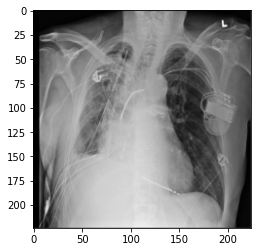

In [48]:
plt.imshow(dataset[0]['img'][0], cmap='gray')

In [18]:
dataset.pathologies

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']